<a href="https://colab.research.google.com/github/karthikmohan1702/prep/blob/main/IMP!!!!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Reg

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
import numpy as np, torch

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56], 
                    [81], 
                    [119], 
                    [22], 
                    [103]], dtype='float32')

# Convert numpy to tensor
x = torch.from_numpy(inputs)
y = torch.from_numpy(targets)
# print(x.shape, y.shape)

# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
# print(w)
# print(b)

# Train for 100 epochs
for i in range(200):
    pred = x.mm(w.t()) + b
    loss = (pred - y).pow(2).sum()
    loss.backward()
    if i % 10==0:
      print(i, loss)
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

0 tensor(25604.4258, grad_fn=<SumBackward0>)
10 tensor(1035.3781, grad_fn=<SumBackward0>)
20 tensor(614.9171, grad_fn=<SumBackward0>)
30 tensor(493.0836, grad_fn=<SumBackward0>)
40 tensor(405.9395, grad_fn=<SumBackward0>)
50 tensor(337.0068, grad_fn=<SumBackward0>)
60 tensor(280.7536, grad_fn=<SumBackward0>)
70 tensor(234.3617, grad_fn=<SumBackward0>)
80 tensor(195.9686, grad_fn=<SumBackward0>)
90 tensor(164.1596, grad_fn=<SumBackward0>)
100 tensor(137.7959, grad_fn=<SumBackward0>)
110 tensor(115.9420, grad_fn=<SumBackward0>)
120 tensor(97.8266, grad_fn=<SumBackward0>)
130 tensor(82.8092, grad_fn=<SumBackward0>)
140 tensor(70.3602, grad_fn=<SumBackward0>)
150 tensor(60.0406, grad_fn=<SumBackward0>)
160 tensor(51.4857, grad_fn=<SumBackward0>)
170 tensor(44.3940, grad_fn=<SumBackward0>)
180 tensor(38.5153, grad_fn=<SumBackward0>)
190 tensor(33.6419, grad_fn=<SumBackward0>)


In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
import numpy as np
import torch

x = torch.tensor(3, dtype=torch.float)
m = torch.tensor(4, dtype=torch.float, requires_grad=True)
b = torch.tensor(5, dtype=torch.float, requires_grad=True)
print(x,m,b)

y = m*x + b
print(y)

y.backward()

print("Gradients --> ", m.grad, b.grad)

tensor(3.) tensor(4., requires_grad=True) tensor(5., requires_grad=True)
tensor(17., grad_fn=<AddBackward0>)
Gradients -->  tensor(3.) tensor(1.)


In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Linear Regression Model using PyTorch built-ins
# Let's re-implement the same model using some built-in functions 
# and classes from PyTorch.

# Imports
import torch.nn as nn
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], 
                   dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs.shape, targets.shape)

# Dataset and DataLoader
# We'll create a TensorDataset, which allows access to rows from inputs and 
# targets as tuples. We'll also create a DataLoader, to split the data into 
# batches while training. It also provides other utilities like shuffling 
# and sampling

# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

# Define dataset
train_ds = TensorDataset(inputs, targets)
print(train_ds[0:3])

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

# nn.Linear
# Instead of initializing the weights & biases manually, we can define the 
# model using nn.Linear.

# Define model
model = nn.Linear(3, 1)
print(model.weight)
print(model.bias)

# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)
print(opt)

# Import nn.functional
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

# Generate predictions - One epoch or once
preds = model(inputs)
preds

# ---------- If want to run for multiple epochs create a fun

#Train the model
#We are ready to train the model now. We can define a utility function fit 
#which trains the model for a given number of epochs.

# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            # loss.backward()
            # opt.step()
            # opt.zero_grad()
            # Zero gradients, perform a backward pass,
            # and update the weights.
            opt.zero_grad()
            loss.backward()
            opt.step()
    print('Training loss: ', loss_fn(model(inputs), targets))
    return model  

final_op_after_epochs = fit(num_epochs=10000, model=model, loss_fn=loss_fn, opt=opt)(inputs)
final_op_after_epochs, targets

torch.Size([15, 3]) torch.Size([15, 1])
(tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]]), tensor([[ 56.],
        [ 81.],
        [119.]]))
Parameter containing:
tensor([[ 0.5630, -0.2876, -0.4453]], requires_grad=True)
Parameter containing:
tensor([0.2646], requires_grad=True)
SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)
tensor(8568.7490, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.9910, grad_fn=<MseLossBackward0>)


(tensor([[ 57.2163],
         [ 82.1909],
         [118.7002],
         [ 21.0851],
         [101.9369],
         [ 57.2163],
         [ 82.1909],
         [118.7002],
         [ 21.0851],
         [101.9369],
         [ 57.2163],
         [ 82.1909],
         [118.7002],
         [ 21.0851],
         [101.9369]], grad_fn=<AddmmBackward0>), tensor([[ 56.],
         [ 81.],
         [119.],
         [ 22.],
         [103.],
         [ 56.],
         [ 81.],
         [119.],
         [ 22.],
         [103.],
         [ 56.],
         [ 81.],
         [119.],
         [ 22.],
         [103.]]))

No handles with labels found to put in legend.


(6, 1) (6, 1)


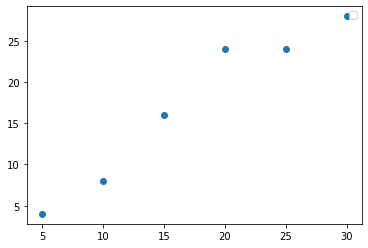

False False
torch.Size([1, 1])
torch.Size([1, 1])
20 45.01030731201172
40 39.88125991821289
60 36.16156768798828
80 33.48149871826172
100 31.561161041259766
120 30.191728591918945
140 29.219018936157227
160 28.530479431152344
180 28.044471740722656
200 27.702255249023438
220 27.46177864074707
240 27.293067932128906
260 27.174882888793945
280 27.092193603515625
300 27.034404754638672
320 26.994033813476562
340 26.96586799621582
360 26.94622039794922
380 26.932523727416992
400 26.922971725463867
420 26.916345596313477
440 26.911701202392578
460 26.908472061157227
480 26.906230926513672
500 26.904666900634766
520 26.903587341308594
540 26.902820587158203
560 26.90230369567871
580 26.901931762695312
600 26.90168571472168
620 26.901506423950195
640 26.901390075683594
660 26.90130615234375
680 26.901229858398438
700 26.901203155517578
720 26.901161193847656
740 26.901140213012695
760 26.90113639831543
780 26.901107788085938
800 26.901124954223633
820 26.90110969543457
840 26.901103973388672


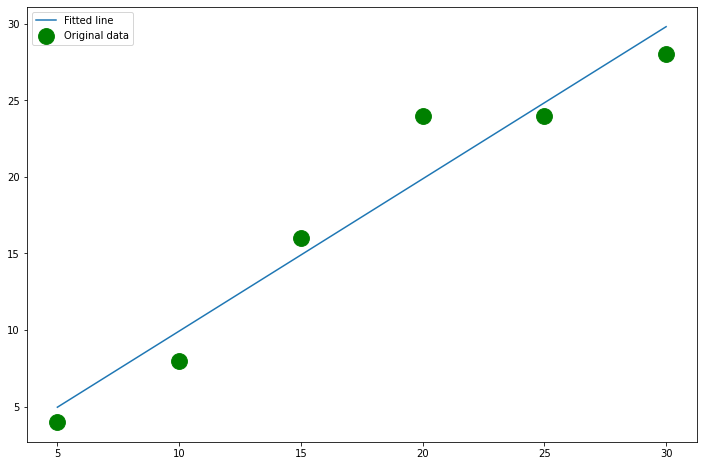

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

x_train = np.array([5, 10, 15, 20, 25, 30]).astype(np.float32).reshape((-1, 1))
y_train = np.array([4, 8, 16, 24, 24, 28]).astype(np.float32).reshape((-1, 1))
print(x_train.shape, y_train.shape)

plt.scatter(x_train, y_train)
plt.legend()
plt.show()

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print(X_train.requires_grad, Y_train.requires_grad)

# Building network
input_size = 1
hidden_size = 1
output_size = 1

# w1 contains weights for the neural network, requires grad should be 
# true, since these are the model params we r gng to train
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
print(w1.shape)

w2 = torch.rand(hidden_size, output_size, requires_grad=True)
print(w2.shape)

learning_rate = 1e-6
for iter in range(1,1000):
  y_pred = X_train.mm(w1).mm(w2)
  loss = (y_pred - Y_train).pow(2).sum()

  if iter % 20 ==0:
    print(iter, loss.item())
  
  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w1.grad.zero_() # zero out the existing gradients
    w2.grad.zero_()

print("w1: ", w1)
print("\n")
print("w2: ", w2)

x_train_tensor = torch.from_numpy(x_train)

predicted_tensor = x_train_tensor.mm(w1).mm(w2)

#convert it to numpy, so we can visualize in matplotlib
predicted = predicted_tensor.detach().numpy()

# for 1000 epochs
plt.figure(figsize=(12,8))

plt.scatter(x_train, y_train, label="Original data", s=250, c='g' )
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()

## Pytorch Basics 

In [ ]:
import torch
t1 = torch.Tensor([1,2])
t2 = torch.Tensor([10,20])

print(t1, t2)

dot_prod = torch.dot(t1, t2)
dot_prod

tensor([1., 2.]) tensor([10., 20.])


tensor(50.)

In [ ]:
matrix = torch.Tensor([[1,2,3],
                       [4,5,6]])

vector = torch.Tensor([0,1,2])

print(matrix, vector)
matrix_vector = torch.mv(matrix, vector)
matrix_vector

tensor([[1., 2., 3.],
        [4., 5., 6.]]) tensor([0., 1., 2.])


tensor([ 8., 17.])

In [ ]:
another_matrix = torch.Tensor([[10,30],
                               [20,0],
                               [0,50]])
print(another_matrix)
matrix_mul = torch.mm(matrix, another_matrix)
matrix_mul

tensor([[10., 30.],
        [20.,  0.],
        [ 0., 50.]])


tensor([[ 50., 180.],
        [140., 420.]])

In [ ]:
torch.argmax(matrix_mul, dim=1) # 420 is the element

tensor([1, 1])

In [ ]:
torch.argmin(matrix_mul, dim=1)

tensor([0, 0])

## Autograd

In [ ]:
# Training using autograd in pytorch

tensor1 = torch.Tensor([[1,2,3],
                        [4,5,6]])
tensor2 = torch.Tensor([[7,8,9],
                        [10,11,12]])
(tensor1, tensor2)
tensor1.requires_grad_()

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [ ]:
output_tensor = tensor1 * tensor2
output_tensor

tensor([[ 7., 16., 27.],
        [40., 55., 72.]], grad_fn=<MulBackward0>)

In [ ]:
output_tensor_mean = (tensor1 * tensor2).mean()
output_tensor_mean

tensor(36.1667, grad_fn=<MeanBackward0>)

In [ ]:
# this will begin the backward pass through our computation graph 
# & now we have gradients for tensor 1, these gradients here are
# the partial derivatives for the params in tensor 1 calc with
# reference to the output tensor
output_tensor_mean.backward()

In [ ]:
tensor1.grad, tensor2.grad

(tensor([[1.1667, 1.3333, 1.5000],
         [1.6667, 1.8333, 2.0000]]), None)

## Python Basics 

In [ ]:
# Write a code to check whether a key is present in dictionary or not?
Dict = {"Name": "Ayesha", "School": "DPS"}
key  = input()
if key in Dict.keys():
  print("Key is present")
else:
  print("Key is not present")

In [ ]:
# pd.datetime()
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
display(df)

display(pd.to_datetime(df))

display(pd.to_datetime('13000101', format='%Y%m%d', errors='ignore'))

In [ ]:
#  Given a list and a number find two numbers in the list that sums up to the number given?
a = [1,2,3,4,5,6,8] 
given_no = 9 
mm = [] 
count =0 
for x,y in enumerate(a): 
  for j in range(x+1, len(a)): 
    total_of_two_items = a[x] + a[j] 
    if total_of_two_items == given_no: 
      mm.append((a[x],a[j])) 
      print (mm)

In [ ]:
print(round(3.33), round(3.64))

In [ ]:
# Sometimes, you may need a largest integer smaller than given number, or a 
# smallest integer, that is larger than given number. This is where floor() 
# and ceil() functions in math module are used.

# As the name suggests, ceil() stands for ceiling. It returns nearest integer 
# greater than given number or numeric expression.

import math
math.ceil(3.33)
4
math.ceil(3.65)
4

------------------------------------------------------

# The floor() function on the other hand returns integer that is smaller than 
# given number or numeric expression indicating that given number is larger 
# than a certain fraction from the resulting integer.

import math
math.floor(3.33)
3
math.floor(3.65)
3

------------------------------------------------------

# The floor() function shows a peculiar behaviour when the number or numeric 
# expression is negative. In such case, the result is floored away from 0.

In [ ]:
str = "hjsh#"
print(str.isalnum())

In [ ]:
max("please help"), max("pleasze help")


In [ ]:
def simpleGeneratorFun():
    yield 1
    yield 2
    yield 3

res = simpleGeneratorFun()
print(res, type(res))
print(next(res))
print(next(res))
print(next(res))

In [ ]:
def pyfunc(r):
  for x in range(r):
      print(' '*(r-x-1)+'*'*(2*x+1))    
pyfunc(9)

# (9-0-1) (2*0 + 1) = (8,1)
# (9-1-1) (2*1 + 1) = (7,3)
# (9-2-1) (2*2 + 1) = (6,5)
# (9-3-1) (2*3 + 1) = (5,7)
# (9-4-1) (2*4 + 1) = (5,9)
# (9-5-1) (2*5 + 1) = (3,11)
# (9-6-1) (2*6 + 1) = (2,13)
# (9-7-1) (2*7 + 1) = (1,15)
# (9-8-1) (2*8 + 1) = (0,17)

In [1]:
l1 = [1,2,3,4,5,6,7]
l1[2]

3

In [3]:
l1.insert(3,10)

In [4]:
l1

[1, 2, 3, 10, 4, 5, 6, 7]

In [5]:
l1.reverse()

In [6]:
l1

[7, 6, 5, 4, 10, 3, 2, 1]

In [11]:
l1.sort()

In [12]:
l1

[1, 2, 3, 4, 5, 6, 7, 10]

In [13]:
l1.sort(reverse=True)

In [14]:
l1

[10, 7, 6, 5, 4, 3, 2, 1]

In [16]:
d1 = {
    "one":"name",
    "two":"place",
}
d1

{'one': 'name', 'two': 'place'}

In [17]:
d1.update({
    "one":"animal"
})

In [18]:
d1

{'one': 'animal', 'two': 'place'}

In [21]:
d1.update({
    "three":"thing"
})

In [22]:
d1

{'one': 'animal', 'three': 'thing', 'two': 'place'}

In [23]:
myset = set(["a", "b", "c"])
print(myset)
  
# Adding element to the set
myset.add("d")
print(myset)

{'b', 'a', 'c'}
{'d', 'b', 'a', 'c'}


In [30]:
# A Python program to demonstrate working of OrderedDict
from collections import OrderedDict

print("This is a Dict:\n")
d = {}
d['a'] = 1
d['b'] = 2
d['c'] = 3
d['d'] = 4

for key, value in d.items():
	print(key, value)

print("\nThis is an Ordered Dict:\n")
od = OrderedDict()
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4

for key, value in od.items():
	print(key, value)


This is a Dict:

a 1
b 2
c 3
d 4

This is an Ordered Dict:

a 1
b 2
c 3
d 4


**Union**

Two sets can be merged using union() function or | operator. Both Hash Table values are accessed and traversed with merge operation perform on them to combine the elements, at the same time duplicates are removed. Time Complexity of this is O(len(s1) + len(s2)) where s1 and s2 are two sets whose union needs to be done

In [27]:

# Python Program to 
# demonstrate union of
# two sets
  
people = {"Jay", "Idrish", "Archil"}
vampires = {"Karan", "Arjun"}
dracula = {"Deepanshu", "Raju"}
  
# Union using union()
# function
population = people.union(vampires)
  
print("Union using union() function")
print(population)
  
# Union using "|"
# operator
population = people|dracula
  
print("\nUnion using '|' operator")
print(population)

list(population)

Union using union() function
{'Archil', 'Idrish', 'Jay', 'Karan', 'Arjun'}

Union using '|' operator
{'Raju', 'Archil', 'Deepanshu', 'Idrish', 'Jay'}


['Raju', 'Archil', 'Deepanshu', 'Idrish', 'Jay']

**Intersection**

This can be done through intersection() or & operator. Common Elements are selected. They are similar to iteration over the Hash lists and combining the same values on both the Table. Time Complexity of this is O(min(len(s1), len(s2)) where s1 and s2 are two sets whose union needs to be done.

In [28]:
# Python program to
# demonstrate intersection
# of two sets

set1 = set()
set2 = set()

for i in range(5):
	set1.add(i)

for i in range(3,9):
	set2.add(i)

# Intersection using
# intersection() function
set3 = set1.intersection(set2)

print("Intersection using intersection() function")
print(set3)

# Intersection using
# "&" operator
set3 = set1 & set2

print("\nIntersection using '&' operator")
print(set3)


Intersection using intersection() function
{3, 4}

Intersection using '&' operator
{3, 4}


**Difference**

To find difference in between sets. Similar to find difference in linked list. This is done through difference() or – operator. Time complexity of finding difference s1 – s2 is O(len(s1))

In [29]:
# Python program to
# demonstrate difference
# of two sets

set1 = set()
set2 = set()

for i in range(5):
	set1.add(i)

for i in range(3,9):
	set2.add(i)

# Difference of two sets
# using difference() function
set3 = set1.difference(set2)

print(" Difference of two sets using difference() function")
print(set3)

# Difference of two sets
# using '-' operator
set3 = set1 - set2

print("\nDifference of two sets using '-' operator")
print(set3)


 Difference of two sets using difference() function
{0, 1, 2}

Difference of two sets using '-' operator
{0, 1, 2}


In [ ]:
# Arrays
ord = 2
arr = [1,23,31,45,87,91]
exp_arr = [31,45,87,91, 1,23]

In [28]:
# Iterative python program to reverse an array

# Function to reverse A[] from start to end
def reverseList(A, start, end):
	while start < end:
		A[start], A[end] = A[end], A[start]
		start += 1
		end -= 1

# Driver function to test above function
A = [1, 2, 3, 4, 5, 6]
print(A)
reverseList(A, 0, 5)
print("Reversed list is")
print(A)
# This program is contributed by Pratik Chhajer


[1, 2, 3, 4, 5, 6]
Reversed list is
[6, 5, 4, 3, 2, 1]


## Python Data Structures

## Classes

**Intro**

To create a new student we create a new instances of the class…so we can have any number of instances. Think of a class as a blueprint for our bldg block and instances of the class are actual building blocks of the class. So they follow the same rules, and they have diff student names, id’s and all the other diff
info. They do not depend on each other.

**SELF** keyword in the function and it’s the first argument in the function and refers to the instance of the class, using the self we refer to our class from our class. So if ur calling the function inside a class then we use something such as “self.add_student”.

**CONSTRUCTOR**. In other words we want the name and student_id to created as soon as we create the instance of the class. _ _ init _ _ replace with this in name in the place of add_student. So this is kinda custom constructor. So
when we are constructing a new instance of the class, must pass the name param and student_id param.

**_ _str _ _** method is called whenever we call the instance of the class.
So the self.name = name && self.student_id = student_id, we refer them to an entire instance, those two var will be available throughout the instance, including any methods we have. So that’s why we can use self.name.capitalize() in the capitalise function. It is easily accessible.

So above self.name = name, was the instance_attributes. All instances are diff, so if u create 2 instances they have diff name, age and other details which are diff from one instance to the other, so What if we want few class attributes to be same along all the classes. Like students going to same school, so here we can use “class_attributes”. Similar to instance attr but they are not defined in functions or methods & are not tied to self or the instance. They are static. They do not change with the instance. So to define them put them anywhere outside the methods and inside the class. But to refer to the static attr or class attr, we need to call them using self.school_name.

print(Student.school_name) === here if u run , u will get the name of the school

We can tie 2 classes together, for eg if we want to add high school student, where he also requires the name and the student_id & we want all the methods that we want for the regular student, so one way is to copy paste the the whole class methods of regular student into high school student or other way is to
inherit the student class and derive a new class out of it called high school class. We can overide the student class while we call it in the high_school class and can also add new methods to it. So it has all the access to methods from the parent class.

**_ _name_ _** specifically named variable allowing us to detect whether a module is run as a script or imported into another module.

**Inheritance**

Inheritance is a mechanism which allows us to create a new class - known as child class - that is based upon an existing class - the parent class, by adding new attributes and methods on top of the existing class. When you do so, the child class inherits attributes and methods of the parent class.

Inheritance really shines when you want to create classes that are very similar. All you need to do is to write the code the for the things that they have common in one class - the parent class. And then write code for things that are very specific in a different class - the child class. This saves you from duplicating a lot of code.

Let's take a more concrete example to illustrate this concept.

Suppose we are creating a program which deals with various shapes. Each shape has some common properties. For example, color of the shape, whether it is filled or not and so on. In addition to that, there are some properties which vary from shape to shape. For example, area and perimeter. The area of rectangle is width * length whereas the area of circle is πr² . At first, it might be tempting to create classes for different shapes like this:

**Polymorphism**

In literal sense, Polymorphism means the ability to take various forms. In Python, Polymorphism allows us to define methods in the child class with the same name as defined in their parent class.

As we know, a child class inherits all the methods from the parent class. However, you will encounter situations where the method inherited from the parent class doesn't quite fit into the child class. In such cases, you will have to re-implement method in the child class. This process is known as Method Overriding.

In [8]:
import numpy as np
import pandas as pd

class School():

  def add_student(self, fname, lname):
    return fname + " " + lname

sch = School()
print(sch.add_student(fname="MS", lname="Dhoni"))



MS Dhoni


In [9]:
# A Sample class with init method
class Person:
   
    # init method or constructor 
    def __init__(self, name):
        self.name = name
   
    # Sample Method 
    def say_hi(self):
        print('Hello, my name is', self.name)
   
p = Person('Nikhil')
p.say_hi()

Hello, my name is Nikhil


In [10]:
# self.name & self.student_id is gng to be available throughout the instance 
# including any methods we have

#using __str__ method
# students=[]
class Student():
  def __init__(self, name, student_id=332):
    #student = {"name": name, "student_id": student_id}
    self.name = name
    self.student_id = student_id
    # students.append(student)

  def __str__(self):
    return "Student is " + self.name

  def capitalize(self):
    return self.name.capitalize()

student = Student("steve") # need to pass the arguments while initializing the class
print(student.capitalize())
print(student)


Steve
Student is steve


In [11]:
# Inheritance

class Student():

  school_name = "Vidyaniketan Public School"

  def __init__(self, name, student_id):
    self.name = name
    self.student_id = student_id
  
  def __str__(self):
    return "Student name is " + self.name + " & his student id is " + str(self.student_id)

  def capitalize(self):
    return self.name.capitalize()


class HighSchoolStudent(Student):
  school_name = "Kendriya Vidalaya"

std = Student(name="rahul", student_id=1122)
print(std)
print(std.capitalize())

high_std = HighSchoolStudent(name="rahul", student_id=1122)
print(high_std)
print(high_std.school_name)

#high_std

Student name is rahul & his student id is 1122
Rahul
Student name is rahul & his student id is 1122
Kendriya Vidalaya


In [12]:
# Override

student = []

class Student():

  school_name = "Vidyaniketan Public School"

  def __init__(self, name, student_id):
    self.name = name
    self.student_id = student_id
  
  def __str__(self):
    return "Student name is " + self.name + " & his student id is " + str(self.student_id)

  def capitalize(self):
    return self.name.capitalize()


class HighSchoolStudent(Student):
  school_name = "Kendriya Vidalaya"

  def capitalize(self):
    original_val = super().capitalize()
    return original_val + "_HS"

std = Student(name="rahul", student_id=1122)
print(std.capitalize())

high_std = HighSchoolStudent(name="ramesh", student_id=1122)
print(high_std.school_name)


print(high_std.capitalize())


Rahul
Kendriya Vidalaya
Ramesh_HS


In [13]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# python101/Chapter-16/multiple_inheritance.py

class A:
    def explore(self):
        print("explore() method called")

class B:
    def search(self):
        print("search() method called")

class C:
    def discover(self):
        print("discover() method called")

class D(A, B, C):
    def test(self):
        print("test() method called")


d_obj = D()
# d_obj.explore()
# d_obj.search()
# d_obj.discover()
d_obj.test()

test() method called


In [ ]:
class A:
    def explore(self):
        print("explore() method from class A")

class B(A):
    def explore(self):
        print("explore() method from class B")


b_obj = B()
a_obj = A()

b_obj.explore()
a_obj.explore()

explore() method from class B
explore() method from class A


In [ ]:
class A:
    def explore(self):
        print("explore() method from class A")

class B(A):
    def explore(self):
        super().explore()  # calling the parent class explore() method
        print("explore() method from class B")


b_obj = B()
b_obj.explore()

explore() method from class A
explore() method from class B


In [14]:
# Python supports object-oriented programming and provides almost all 
# OOP features to use in programs.

# A Python class is a blueprint for creating the objects. It defines member 
# variables and gets their behavior associated with them.

# We can make it by using the keyword “class.” An object gets created from 
# the constructor. This object represents the instance of the class.

# In Python, we generate classes and instances in the following way.

class Human:  # Create the class
  pass
man = Human()  # Create the instance
print(man)


In [15]:
# What are Class or Static Variables in Python programming?
# In Python, all the objects share common class or static variables.

# But the instance or non-static variables are altogether different for 
# different objects.

# The programming languages like C++ and Java need to use the static keyword
#  to make a variable as the class variable. However, Python has a unique way 
#  to declare a static variable.

# All names initialized with a value in the class declaration becomes the class
# variables. And those which get assigned values in the class methods becomes 
# the instance variables.

class Test: 
    aclass = 'programming' # A class variable 
    def __init__(self, ainst): 
        self.ainst = ainst # An instance variable 
  
# Objects of CSStudent class 
test1 = Test(1) 
test2 = Test(2) 
  
print(test1.aclass)
print(test2.aclass)
print(test1.ainst)
print(test2.ainst)

# A class variable is also accessible using the class name
print(Test.aclass)


programming
programming
1
2
programming


In [16]:
# Inheritance is an OOP mechanism which allows an object to access its parent 
# class features. It carries forward the base class functionality to the child.

class PC: # Base class
    processor = "Xeon" # Common attribute # Class variable
    def set_processor(self, new_processor):
        processor = new_processor

class Desktop(PC): # Derived class
    os = "Mac OS High Sierra" # Personalized attribute
    ram = "32 GB"

class Laptop(PC): # Derived class
    os = "Windows 10 Pro 64" # Personalized attribute
    ram = "16 GB"

desk = Desktop()
print(desk.processor, desk.os, desk.ram)

lap = Laptop()
print(lap.processor, lap.os, lap.ram)

Xeon Mac OS High Sierra 32 GB
Xeon Windows 10 Pro 64 16 GB


In [17]:
# How to assign values for the Class attributes at runtime?
# We can specify the values for the attributes at runtime. We need to 
# add an init method and pass input to object constructor. See the 
# following example demonstrating this.

class Human:
  def __init__(self, profession):
      self.profession = profession
  def set_profession(self, new_profession):
      self.profession = new_profession

man = Human("Manager")
print(man.profession)


Manager


In [18]:
# After we added the attributes, we can go on to define the functions. Generally,
# we call them methods. In the method signature, we always have to provide 
# the first argument with a self-keyword.

class Human:
  profession = "programmer"
  def set_profession(self, new_profession):
    self.profession = new_profession      
man = Human()
man.set_profession("Manager")
print(man.profession)


Manager


In [19]:
# A class is useless if it has not defined any functionality. We can do so by 
# adding attributes. They work as containers for data and functions. We can add 
# an attribute directly specifying inside the class body.

class Human:
  profession = "programmer" # specify the attribute 'profession' of the class
man = Human()
print(man.profession)



programmer


In [20]:
# python101/Chapter-16/inheritance.py

import math

class Shape:

    def __init__(self, color='black', filled=False):
        self.__color = color
        self.__filled = filled

    def get_color(self):
        return self.__color

    def set_color(self, color):
        self.__color = color

    def get_filled(self):
        return self.__filled

    def set_filled(self, filled):
        self.__filled = filled


class Rectangle(Shape):

    def __init__(self, length, breadth):
        super().__init__()
        self.__length = length
        self.__breadth = breadth

    def get_length(self):
        return self.__length

    def set_length(self, length):
        self.__length = length

    def get_breadth(self):
        return self.__breadth

    def set_breadth(self, breadth):
        self.__breadth = breadth

    def get_area(self):
        return self.__length * self.__breadth

    def get_perimeter(self):
        return 2 * (self.__length + self.__breadth)


class Circle(Shape):
    def __init__(self, radius):
        super().__init__()
        self.__radius = radius

    def get_radius(self):
        return self.__radius

    def set_radius(self, radius):
        self.__radius = radius

    def get_area(self):
        return math.pi * self.__radius ** 2

    def get_perimeter(self):
        return 2 * math.pi * self.__radius


r1 = Rectangle(10.5, 2.5)

print("Area of rectangle r1:", r1.get_area())
print("Perimeter of rectangle r1:", r1.get_perimeter())
print("Color of rectangle r1:", r1.get_color())
print("Is rectangle r1 filled ? ", r1.get_filled())
r1.set_filled(True)
print("Is rectangle r1 filled ? ", r1.get_filled())
r1.set_color("orange")
print("Color of rectangle r1:", r1.get_color())

c1 = Circle(12)

print("\nArea of circle c1:", format(c1.get_area(), "0.2f"))
print("Perimeter of circle c1:", format(c1.get_perimeter(), "0.2f"))
print("Color of circle c1:", c1.get_color())
print("Is circle c1 filled ? ", c1.get_filled())
c1.set_filled(True)
print("Is circle c1 filled ? ", c1.get_filled())
c1.set_color("blue")
print("Color of circle c1:", c1.get_color())

Area of rectangle r1: 26.25
Perimeter of rectangle r1: 26.0
Color of rectangle r1: black
Is rectangle r1 filled ?  False
Is rectangle r1 filled ?  True
Color of rectangle r1: orange

Area of circle c1: 452.39
Perimeter of circle c1: 75.40
Color of circle c1: black
Is circle c1 filled ?  False
Is circle c1 filled ?  True
Color of circle c1: blue


In [21]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# python101/Chapter-16/multiple_inheritance.py

class A:
    def explore(self):
        print("explore() method called")

class B:
    def search(self):
        print("search() method called")

class C:
    def discover(self):
        print("discover() method called")

class D(A, B, C):
    def test(self):
        print("test() method called")


d_obj = D()
d_obj.explore()
d_obj.search()
d_obj.discover()
d_obj.test()

explore() method called
search() method called
discover() method called
test() method called


## DateTime

In [22]:
from datetime import date
 
# calling the today
# function of date class
today = date.today()
 
print("Today's date is", today)

Today's date is 2022-02-13


In [23]:
from datetime import datetime

# Getting Datetime from timestamp
date_time = datetime.fromtimestamp(1887639468)
print("Datetime from timestamp:", date_time)


Datetime from timestamp: 2029-10-25 16:17:48


In [24]:
from datetime import date

# calling the today
# function of date class
today = date.today()

# Converting the date to the string
Str = date.isoformat(today)
print("String Representation", Str)
print(type(Str))


String Representation 2022-02-13
<class 'str'>


In [ ]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%Y %M')

In [25]:

from datetime import datetime

now = datetime.now() # current date and time

year = now.strftime("%Y")
print("year:", year)

month = now.strftime("%m")
print("month:", month)

day = now.strftime("%d")
print("day:", day)

time = now.strftime("%H:%M:%S")
print("time:", time)

date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

year: 2022
month: 02
day: 13
time: 16:15:23
date and time: 02/13/2022, 16:15:23


In [26]:
# Example 2: Creating string from a timestamp

from datetime import datetime

timestamp = 1528797322
date_time = datetime.fromtimestamp(timestamp)

print("Date time object:", date_time)

d = date_time.strftime("%m/%d/%Y, %H:%M:%S")
print("Output 2:", d)	

d = date_time.strftime("%d %b, %Y")
print("Output 3:", d)

d = date_time.strftime("%d %B, %Y")
print("Output 4:", d)

d = date_time.strftime("%I%p")
print("Output 5:", d)

Date time object: 2018-06-12 09:55:22
Output 2: 06/12/2018, 09:55:22
Output 3: 12 Jun, 2018
Output 4: 12 June, 2018
Output 5: 09AM


## Machine Learning

In [ ]:
# For Python users, below is the code:
# Decision tree

#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(x_test)

In [ ]:
'''
The following code is for the Random Forest
Created by - ANALYTICS VIDHYA
'''

# importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# view the top 3 rows of the dataset
print(train_data.head(3))

# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

'''

Create the object of the Random Forest model
You can also add other parameters and test your code here
Some parameters are : n_estimators and max_depth
Documentation of sklearn RandomForestClassifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

'''
model = RandomForestClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


In [27]:
# You are given reviews for movies below:

reviews = ["movie is unwatchable no matter how decent the first half is.",
"somewhat funny and well  paced action thriller that has jamie foxx as a hapless fast  talking hoodlum who is chosen by an overly demanding", 
"morse is okay as the agent who comes up with the ingenious plan to get whoever did it at all cost."]

# Your task is to find sentiments from the review above. For this, you first write 
# a code to find count of individual words in all the sentences.
from collections import Counter
counts = Counter()

for i in range(len(reviews)):
    for word in reviews[i].split(" "):
        counts[word] += 1
print(counts)

Counter({'is': 3, 'the': 3, '': 2, 'as': 2, 'who': 2, 'movie': 1, 'unwatchable': 1, 'no': 1, 'matter': 1, 'how': 1, 'decent': 1, 'first': 1, 'half': 1, 'is.': 1, 'somewhat': 1, 'funny': 1, 'and': 1, 'well': 1, 'paced': 1, 'action': 1, 'thriller': 1, 'that': 1, 'has': 1, 'jamie': 1, 'foxx': 1, 'a': 1, 'hapless': 1, 'fast': 1, 'talking': 1, 'hoodlum': 1, 'chosen': 1, 'by': 1, 'an': 1, 'overly': 1, 'demanding': 1, 'morse': 1, 'okay': 1, 'agent': 1, 'comes': 1, 'up': 1, 'with': 1, 'ingenious': 1, 'plan': 1, 'to': 1, 'get': 1, 'whoever': 1, 'did': 1, 'it': 1, 'at': 1, 'all': 1, 'cost.': 1})


## How to run a basic RNN model using Pytorch?

This recipe uses the MNIST handwritten digits dataset for image classification. The RNN model predicts what the handwritten digit is. The recipe uses the following steps to accurately predict the handwritten digits:
- Import Libraries
- Prepare Dataset
- Create RNN Model
- Instantiate Model Class
- Instantiate Loss Class
- Instantiate Optimizer Class
- Tran the Model
- Prediction
This recipe uses the helpful PyTorch utility DataLoader - which provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers.

What is RNN ?
A recurrent neural network (RNN) is a type of deep learning artificial neural network commonly used in speech recognition and natural language processing (NLP). This neural net processes sequential data, and takes in as input both the new input and the output (or a hidden layer) of the net in the previous step. Since they have backward connection in their hidden layers they have memory states.

What is PyTorch ?
Pytorch is a Python deep learning library that uses the power of graphics processing units. Its strengths compared to other tools like tensorflow are its flexibility and speed. You can use other Python packages such as NumPy, SciPy to extend PyTorch functionalities.



In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
torch.manual_seed(1)

In [ ]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [ ]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


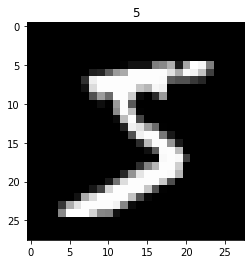

In [ ]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()


In [ ]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.
# shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [ ]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [ ]:
# training and testing
EPOCH = 1
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:

            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            # print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)
            print(epoch, loss, accuracy)

0 tensor(2.3088, grad_fn=<NllLossBackward>) 0.089
0 tensor(1.3115, grad_fn=<NllLossBackward>) 0.586
0 tensor(0.7964, grad_fn=<NllLossBackward>) 0.688
0 tensor(0.3439, grad_fn=<NllLossBackward>) 0.838
0 tensor(0.3381, grad_fn=<NllLossBackward>) 0.802
0 tensor(0.4272, grad_fn=<NllLossBackward>) 0.858
0 tensor(0.2953, grad_fn=<NllLossBackward>) 0.907
0 tensor(0.2332, grad_fn=<NllLossBackward>) 0.922
0 tensor(0.0738, grad_fn=<NllLossBackward>) 0.9305
0 tensor(0.0783, grad_fn=<NllLossBackward>) 0.914
0 tensor(0.1300, grad_fn=<NllLossBackward>) 0.928
0 tensor(0.2653, grad_fn=<NllLossBackward>) 0.9405
0 tensor(0.3139, grad_fn=<NllLossBackward>) 0.935
0 tensor(0.1752, grad_fn=<NllLossBackward>) 0.94
0 tensor(0.0267, grad_fn=<NllLossBackward>) 0.951
0 tensor(0.2825, grad_fn=<NllLossBackward>) 0.9405
0 tensor(0.0765, grad_fn=<NllLossBackward>) 0.954
0 tensor(0.1912, grad_fn=<NllLossBackward>) 0.956
0 tensor(0.0842, grad_fn=<NllLossBackward>) 0.949


In [ ]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


### How to save and reload a deep learning model in Pytorch?

This recipe provides options to save and reload an entire model or just the parameters of the model. While reloading this recipe copies the parameter from 1 net to another net. There are 3 main functions involved in saving and loading a model in pytorch.

1. torch.save: This saves a serialized object to disk. It uses python's pickle utility for serialization. Models, tensors and dictionaries can be saved using this function.
2. torch.load: torch.load: Uses pickle's unpickling facilities to deserialize pickled object files to memory. This function also facilitates the device to load the data into.
3. torch.nn.Module.load_state_dict: Loads a model's parameter dictionary using a deserialized state_dict. The learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model's parameters (accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor.

What is PyTorch ?
Pytorch is a Python-based scientific computing package that uses the power of graphics processing units and can replace the numpy library. It is also a very popular deep learning research platform built for flexibility and speed. You can use other Python packages such as NumPy, SciPy to extend PyTorch functionalities.

What is Deep Learning Model ?
Deep learning is a subset of machine learning. Deep learning uses neural networks to make predictions. A neural network takes inputs, which are then processed using hidden layers using weights that are adjusted during training. The model then outputs a prediction.



In [ ]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [ ]:
#sample data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [ ]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters


In [ ]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [ ]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

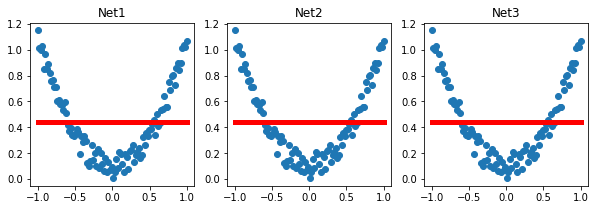

In [ ]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

### How to use auto encoder for unsupervised learning models?

This recipe builds an autoencoder for compressing the number of features in the MNIST handwritten digits dataset.

For building an autoencoder, three components are used in this recipe :
- an encoding function,
- a decoding function,
- a loss function between the amount of information loss between the compressed representation of your data and the decompressed representation.
What is an Auto encoder ?
An auto encoder is used to encode features so that it takes up much less storage space but effectively represents the same data. It is a type of neural network that learns efficient data codings in an unsupervised way. The aim of an autoencoder is to learn a representation for a dataset, for dimensionality reduction, by ignoring signal "noise".

What is Unsupervised learning model ?
Unsupervised machine learning models infer patterns from a dataset without reference to known, or labeled, outcomes. Unlike supervised machine learning, unsupervised machine learning methods cannot be directly applied to a problem because you have no idea what the values for the output data might be, making it impossible for you to train the algorithm the way you normally would. Unsupervised learning can instead be used for discovering the underlying structure of the data.

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [ ]:
torch.manual_seed(1)    # reproducible

In [ ]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [ ]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    # this is training data
    transform=torchvision.transforms.ToTensor(),
    # Converts a PIL.Image or numpy.ndarray to

    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
    # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


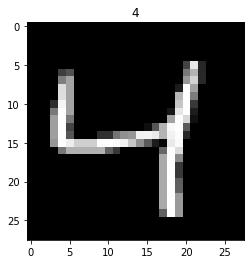

In [ ]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [ ]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
autoencoder = AutoEncoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Epoch:  0 | train loss: 0.1674


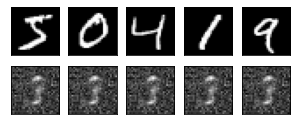

Epoch:  0 | train loss: 0.0580


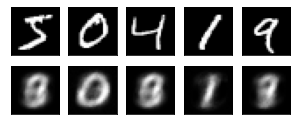

Epoch:  5 | train loss: 0.0414


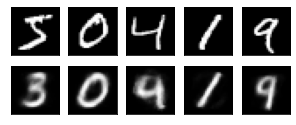

Epoch:  5 | train loss: 0.0367


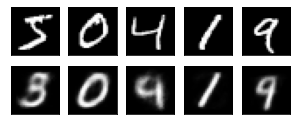

Epoch:  9 | train loss: 0.0364


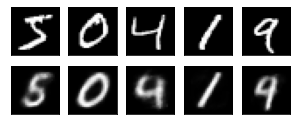

Epoch:  9 | train loss: 0.0393


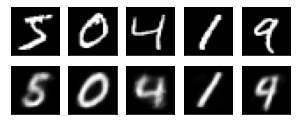

In [ ]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss)

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)

            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))

            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i],
                                          (28, 28)), cmap='gray');
                a[0][i].set_xticks(()); a[0][i].set_yticks(())

            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i],
                                          (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); #plt.pause(0.05)


## RNN

In [ ]:
import torch
from torch import nn

import numpy as np

First, we'll define the sentences that we want our model to output when fed with the first word or the first few characters.

Then we'll create a dictionary out of all the characters that we have in the sentences and map them to an integer. This will allow us to convert our input characters to their respective integers (char2int) and vice versa (int2char).

In [ ]:
text = ['hey how are you','good i am fine','have a nice day']

# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

# The char2int dictionary will look like this: It holds all the letters/symbols 
# that were present in our sentences and maps each of them to a unique integer.
char2int

{' ': 7,
 'a': 10,
 'c': 13,
 'd': 3,
 'e': 9,
 'f': 4,
 'g': 14,
 'h': 15,
 'i': 0,
 'm': 11,
 'n': 12,
 'o': 5,
 'r': 2,
 'u': 16,
 'v': 1,
 'w': 8,
 'y': 6}

Next, we'll be padding our input sentences to ensure that all the sentences are of standard length. While RNNs are typically able to take in variably sized inputs, we will usually want to feed training data in batches to speed up the training process. In order to used batches to train on our data, we'll need to ensure that each sequence within the input data is of equal size.

Therefore, in most cases, padding can be done by filling up sequences that are too short with 0 values and trimming sequences that are too long. In our case, we'll be finding the length of the longest sequence and padding the rest of the sentences with blank spaces to match that length.

In [ ]:
# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))

# Padding

# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '

As we're going to predict the next character in the sequence at each time step, we'll have to divide each sentence into:

Input data
- The last input character should be excluded as it does not need to be fed into the model.

Target/Ground Truth Label
- One time-step ahead of the Input data as this will be the "correct answer" for the model at each time step corresponding to the input data

In [ ]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
  input_seq.append(text[i][:-1])
    
    # Remove first character for target sequence
  target_seq.append(text[i][1:])
  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: hey how are yo
Target Sequence: ey how are you
Input Sequence: good i am fine
Target Sequence: ood i am fine 
Input Sequence: have a nice da
Target Sequence: ave a nice day


Our input sequence and target sequence will look like this:

Input Sequence: hey how are yo
Target Sequence: ey how are you
The target sequence will always be one-time step ahead of the input sequence.

Now we can convert our input and target sequences to sequences of integers instead of a sequence of characters by mapping them using the dictionaries we created above. This will allow us to one-hot-encode our input sequence subsequently.

In [ ]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

Before encoding our input sequence into one-hot vectors, we'll define 3 key variables:

1. dict_size: Dictionary size - The number of unique characters that we have in our text
- This will determine the one-hot vector size as each character will have an assigned index in that vector

2. seq_len: The length of the sequences that we're feeding into the model
- As we standardized the length of all our sentences to be equal to the longest sentences, this value will be the max length - 1 as we removed the last character input as well

3. batch_size: The number of sentences that we defined and are going to feed into the model as a batch

In [ ]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

We also defined a helper function that creates arrays of zeros for each character and replaces the corresponding character index with a 1.

In [ ]:
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)

Since we're done with all the data pre-processing, we can now move the data from NumPy arrays to PyTorch's very own data structure - Torch Tensors.

In [ ]:
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

Now we've reached the fun part of this project! We'll be defining the model using the Torch library, and this is where you can add or remove layers, be it fully connected layers, convolutional layers, vanilla RNN layers, LSTM layers, and many more! In this post, we'll be using the basic nn.rnn to demonstrate a simple example of how RNNs can be used.

Before we start building the model, let's use a built-in feature in PyTorch to check the device we're running on (CPU or GPU). This implementation will not require GPU as the training is really simple. However, as you progress on to large datasets and models with millions of trainable parameters, using the GPU will be very important to speed up your training.

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


To start building our own neural network model, we can define a class that inherits PyTorch’s base class(nn.module) for all neural network modules. After doing so, we can start defining some variables and also the layers for our model under the constructor. For this model, we’ll only be using 1 layer of RNN followed by a fully connected layer. The fully connected layer will be in charge of converting the RNN output to our desired output shape.

We’ll also have to define the forward pass function under forward() as a class method. The forward function is executed sequentially, therefore we’ll have to pass the inputs and the zero-initialized hidden state through the RNN layer first, before passing the RNN outputs to the fully-connected layer. Note that we are using the layers that we defined in the constructor.

The last method that we have to define is the method that we called earlier to initialize the hidden state - init_hidden(). This basically creates a tensor of zeros in the shape of our hidden states.

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

After defining the model above, we'll have to instantiate the model with the relevant parameters and define our hyper-parameters as well. The hyper-parameters we're defining below are:

- n_epochs: Number of Epochs --> Number of times our model will go through the entire training dataset
- lr: Learning Rate --> Rate at which our model updates the weights in the cells each time back-propagation is done
For a more in-depth guide on hyper-parameters, you can refer to this comprehensive article.

Similar to other neural networks, we have to define the optimizer and loss function as well. We’ll be using CrossEntropyLoss as the final output is basically a classification task and the common Adam optimizer.

In [ ]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 100
lr=0.01

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Now we can begin our training! As we only have a few sentences, this training process is very fast. However, as we progress, larger datasets and deeper models mean that the input data is much larger and the number of parameters within the model that we have to compute is much more.

In [ ]:
# Training Run
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    input_seq.to(device)
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100............. Loss: 2.3879
Epoch: 20/100............. Loss: 2.0433
Epoch: 30/100............. Loss: 1.6828
Epoch: 40/100............. Loss: 1.3055
Epoch: 50/100............. Loss: 0.9631
Epoch: 60/100............. Loss: 0.6900
Epoch: 70/100............. Loss: 0.4902
Epoch: 80/100............. Loss: 0.3539
Epoch: 90/100............. Loss: 0.2629
Epoch: 100/100............. Loss: 0.2024


Let’s test our model now and see what kind of output we will get. As a first step, we'll define some helper function to convert our model output back to text.

In [ ]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [ ]:
# This function takes the desired output length and input characters as arguments, returning the produced sentence
def sample(model, out_len, start='hey'):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

Let's run the function with our model and the starting words 'good'.

In [ ]:
sample(model, 15, 'good')

'good i am fine '

As we can see, the model is able to come up with the sentence ‘good i am fine ‘ if we feed it with the words ‘good’. Pretty good for a few lines of code, yea?

## Flask

In [ ]:
!pip install flask

In [ ]:
from flask import Flask

In [ ]:
app = Flask(__name__)

@app.route("/")
def hello():
  return "Hello World"

if __name__ == "__main__":
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
